In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr

### Hypothesis:
"The sales of luxury cars in Austria are positively correlated with the annual real GDP growth."

---

### Motivation:
Previous studies suggest that luxury goods, including luxury cars, often show increased sales during periods of economic growth, as consumers have higher disposable income. This hypothesis aims to investigate whether this trend holds in Austria by examining the correlation between luxury car sales and annual real GDP growth.

---

### Testable Endpoints:
- **Luxury car sales data**: The number of new luxury car registrations (e.g., Bentley, Rolls Royce, Ferrari) in Austria for each year.
- **GDP growth data**: The annual percentage change in real GDP growth for Austria.
- **Correlation analysis**: Statistical correlation between luxury car sales and real GDP growth (e.g., using Pearson correlation coefficient).

---

### Real-Life Use Case:
The results can help luxury car manufacturers and dealerships better understand market trends and align their marketing strategies with economic indicators. Additionally, policymakers can use these insights to predict consumer behavior in the luxury segment during periods of economic fluctuation.

In [2]:
registrations = pd.read_csv('./Data/OGD_fkfzul0759_OD_PkwNZL_1.csv', sep=';')
makes = pd.read_csv("./Data/OGD_fkfzul0759_OD_PkwNZL_1_C-J59-0.csv", sep=';')
registrations.columns = ("Make", "Time", "Type", "Registrations")
#all cars are PKW so we dont need the type column
registrations = registrations.drop(columns="Type")
#extracting the month and year from the time column and convert to datetime
registrations["Time"] = registrations["Time"].apply(lambda x: f"{x[-2:]}/{x[4:8]}")
registrations["Time"] = pd.to_datetime(registrations["Time"], format="%m/%Y")
#get name of make from makes
registrations ["Make"] = registrations["Make"].map(makes.set_index("code")["name"])
registrations["Make Name"] = registrations["Make"].apply(lambda x: x.split(" ")[0])
#set index on time and make
registrations = registrations.set_index(["Time", "Make"], verify_integrity=True)
registrations

,,Registrations,Make Name
Time,Make,,
2008-05-01,Abarth <070022>,5,Abarth
2008-06-01,Abarth <070022>,4,Abarth
2008-07-01,Abarth <070022>,20,Abarth
2008-08-01,Abarth <070022>,15,Abarth
2008-09-01,Abarth <070022>,11,Abarth
...,...,...,...
2012-12-01,Sonstige <..9999>,1,Sonstige
2014-03-01,Sonstige <..9999>,1,Sonstige
2016-07-01,Sonstige <..9999>,1,Sonstige


In [3]:
luxury_car_manufacturers = np.array([
    'Aston Martin',
    'Bentley',
    'Bugatti',
    'Ferrari',
    'Jaguar',
    'Koenigsegg',
    'Lamborghini',
    'Lucid',
    'McLaren',
    'Maserati',
    'Maybach',
    'Porsche',
    'Rolls Royce',
    'Wiesmann',
    'Mercedes',
    'BMW'
]);

In [21]:
# luxus_car_registrations = registrations[registrations["Make Name"].isin(luxury_car_manufacturers)].copy()
luxus_car_registrations = registrations.copy()
luxus_car_registrations.reset_index(inplace=True)
luxus_car_registrations["Year-Quarter"] = luxus_car_registrations['Time'].dt.to_period('Q').astype(str)
luxus_car_registrations["Year"] = luxus_car_registrations["Time"].dt.isocalendar().year
luxus_car_registrations = luxus_car_registrations[(luxus_car_registrations["Year"] > 1999) & (luxus_car_registrations["Year"] < 2023)]
luxus_car_registrations.head()

,Time,Make,Registrations,Make Name,Year-Quarter,Year
0,2008-05-01,Abarth <070022>,5,Abarth,2008Q2,2008
1,2008-06-01,Abarth <070022>,4,Abarth,2008Q2,2008
2,2008-07-01,Abarth <070022>,20,Abarth,2008Q3,2008
3,2008-08-01,Abarth <070022>,15,Abarth,2008Q3,2008
4,2008-09-01,Abarth <070022>,11,Abarth,2008Q3,2008


### For Year

In [22]:
reg_by_year = luxus_car_registrations.groupby("Year")["Registrations"].sum().to_frame()
reg_by_year.reset_index(inplace=True)
reg_by_year = reg_by_year.iloc[:-1]
reg_by_year.head()

,Year,Registrations
0,2000,282452
1,2001,293528
2,2002,279493
3,2003,300121
4,2004,334716


In [7]:
test = pd.read_csv("./Data/OeNB_7_1_AusgewähltevolkswirtschaftlicheKennziffern_20241008_192245.csv", encoding='latin1', sep=";")
test["Indikator"].unique()

array(['BIP je Einwohner, nominell', 'BIP je Erwerbstätigen, nominell',
       'BIP je Einwohner, real, auf VJ-Preisbasis - RJ2015',
       'BIP je Erwerbstätigen, real, auf VJ-Preisbasis - RJ2015',
       'Bruttolöhne und -Gehälter je Vollzeitäquivalent monatlich, nominell',
       'Nettolöhne und -Gehälter je Vollzeitäquivalent monatlich, nominell',
       'Forschungsquote (ESVG 2010)', 'Leistungsbilanzquote ',
       'Private Konsumquote', 'Investitionsquote',
       'Warenimportquote (im engeren Sinn)',
       'Importquote im weiteren Sinn',
       'Warenexportquote (im engeren Sinn)',
       'Exportquote im weiteren Sinn',
       'Sparquote private Haushalte inkl. Priv. Dienste ohne Erwerbstätigkeit',
       'Bildungsquote', 'Gesundheitsquote', 'Sozialquote', 'Abgabenquote',
       'Bereinigte Lohnquote',
       'Bruttoinlandsprodukt real, auf VJ-Preisbasis RJ2015,Veränd.zum VJ in %',
       'Lohnstückkosten - Sachgütererzeugung Österreich, Ver. zum Vorjahr in %',
       'Lohnstüc

In [8]:
bip_yearly = pd.read_csv("./Data/OeNB_10_8_Bruttoinlandsproduktreal_Yearly.csv", encoding='latin1', sep=";")
bip_yearly.drop(columns=["Monat","Tag","Einheit","Status","Produzent","Region / Geschäftspartner","Datentyp", "Sortierkriterium des Indikators"], inplace=True)
bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains("Österreich")].copy()
bip_yearly = bip_yearly[bip_yearly["Jahr"] < 2022]
bip_yearly.drop(columns=["Periode", "Halbjahr","Quartal","Indikator"], inplace=True)
bip_yearly["Werte"] = bip_yearly["Werte"].str.replace(",", ".").astype(float)
bip_yearly.head(1)

,Jahr,Werte
10,2000,3.4


In [9]:
bip_yearly = pd.read_csv("./Data/OeNB_10_9_BruttoinlandsproduktjeEinwohnerinKaufkraftstandards.csv", encoding='latin1', sep=";")
bip_yearly.drop(columns=["Monat","Tag","Einheit","Status","Produzent","Region / Geschäftspartner","Datentyp", "Sortierkriterium des Indikators"], inplace=True)
bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains("Österreich")].copy()
bip_yearly = bip_yearly[bip_yearly["Jahr"] < 2022]
bip_yearly.drop(columns=["Periode", "Halbjahr","Quartal","Indikator"], inplace=True)
bip_yearly.head(1)

,Jahr,Werte
13,2000,24401


In [10]:
bip_yearly = pd.read_csv("./Data/OeNB_7_1_AusgewähltevolkswirtschaftlicheKennziffern_20241008_192245.csv", encoding='latin1', sep=";")
bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains("Bruttoinlandsprodukt real, auf VJ-Preisbasis RJ2015,Veränd.zum VJ in %")].copy()
bip_yearly.drop(columns=["Monat","Tag","Einheit","Status","Produzent","Region / Geschäftspartner","Datentyp", "Sortierkriterium des Indikators"], inplace=True)
bip_yearly = bip_yearly[bip_yearly["Jahr"] < 2022]
bip_yearly.drop(columns=["Periode", "Halbjahr","Quartal","Indikator"], inplace=True)
bip_yearly["Werte"] = bip_yearly["Werte"].str.replace(",", ".").astype(float)
bip_yearly.head(1)

,Jahr,Werte
20,2000,3.2


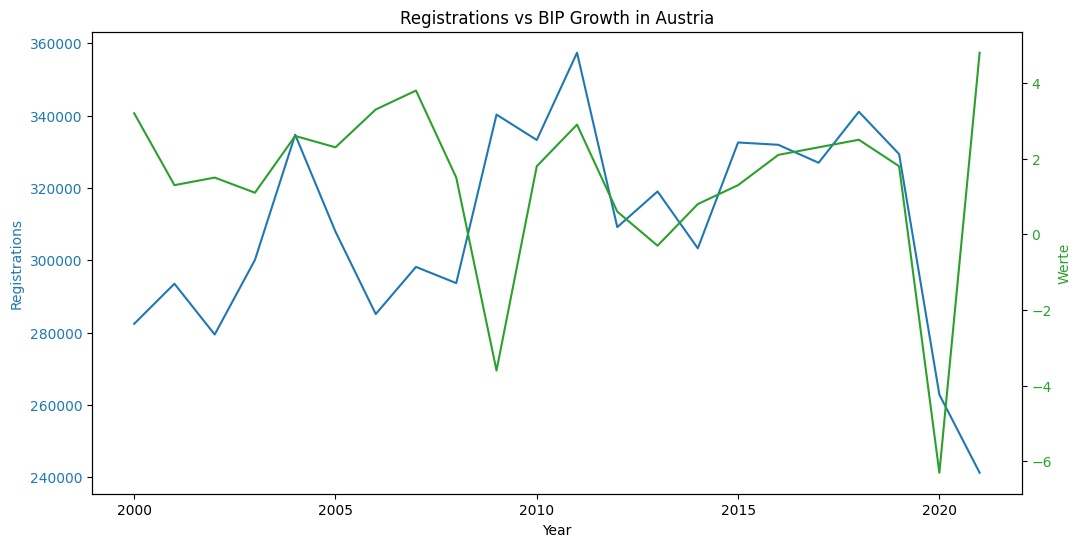

In [23]:
# Create a plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Ändere die Breite (z.B. 12) nach Bedarf

# Plotting Registrations on left y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Registrations", color="tab:blue")
ax1.plot(reg_by_year["Year"], reg_by_year["Registrations"], color="tab:blue", label="Registrations")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second y-axis for BIP Growth
ax2 = ax1.twinx()
ax2.set_ylabel("Werte", color="tab:green")
ax2.plot(bip_yearly["Jahr"], bip_yearly["Werte"], color="tab:green", label="BIP Growth (%)")
ax2.tick_params(axis="y", labelcolor="tab:green")

# Add titles
plt.title("Registrations vs BIP Growth in Austria")

# Show the plot
plt.show()

In [12]:
def _plot(dataset_name):
    bip_yearly = pd.read_csv("./Data/OeNB_7_1_AusgewähltevolkswirtschaftlicheKennziffern_20241008_192245.csv", encoding='latin1', sep=";")
    bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains(dataset_name)].copy()
    bip_yearly.drop(columns=["Monat","Tag","Einheit","Status","Produzent","Region / Geschäftspartner","Datentyp", "Sortierkriterium des Indikators"], inplace=True)
    bip_yearly = bip_yearly[bip_yearly["Jahr"] < 2022]
    bip_yearly.drop(columns=["Periode", "Halbjahr","Quartal","Indikator"], inplace=True)
    bip_yearly["Werte"] = bip_yearly["Werte"].str.replace(",", ".").astype(float)
    bip_yearly.head(1)

    # Create a plot
    fig, ax1 = plt.subplots(figsize=(12, 6))  # Ändere die Breite (z.B. 12) nach Bedarf

    # Plotting Registrations on left y-axis
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Registrations", color="tab:blue")
    ax1.plot(reg_by_year["Year"], reg_by_year["Registrations"], color="tab:blue", label="Registrations")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Create a second y-axis for BIP Growth
    ax2 = ax1.twinx()
    ax2.set_ylabel(dataset_name, color="tab:green")
    ax2.plot(bip_yearly["Jahr"], bip_yearly["Werte"], color="tab:green", label="BIP Growth (%)")
    ax2.tick_params(axis="y", labelcolor="tab:green")

    # Add titles
    plt.title(dataset_name)

    # Show the plot
    plt.show()

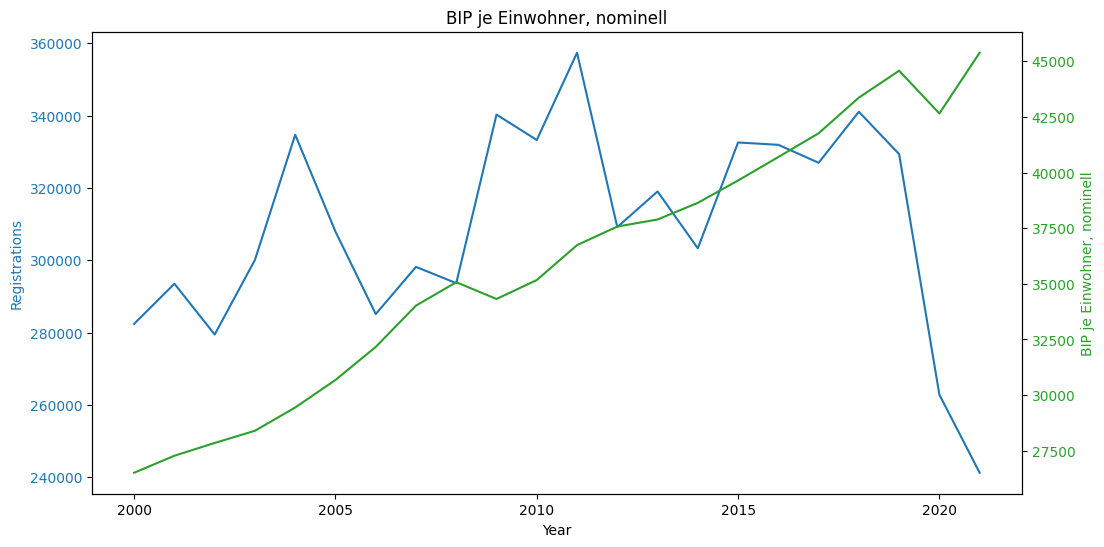

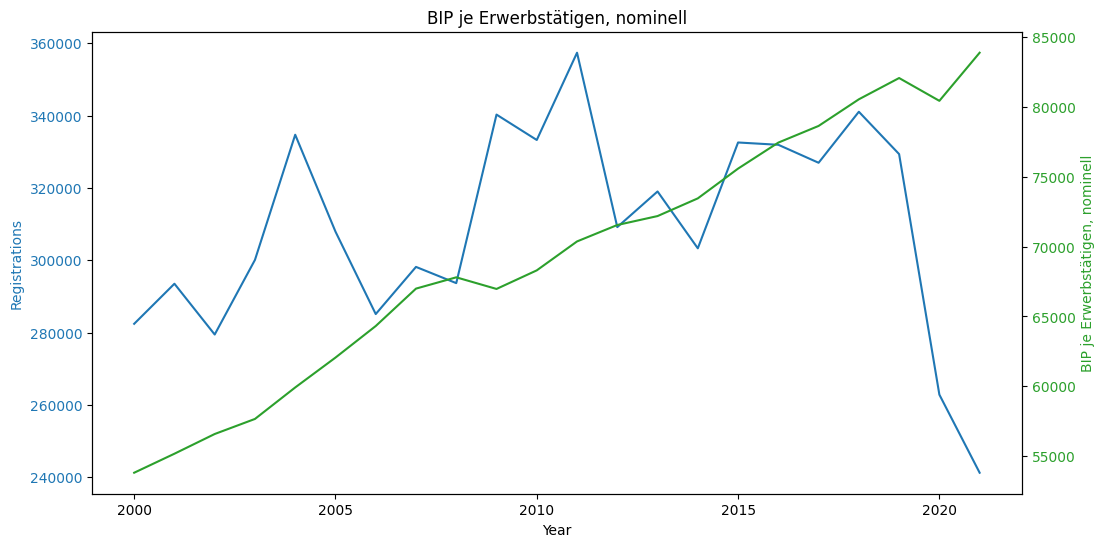

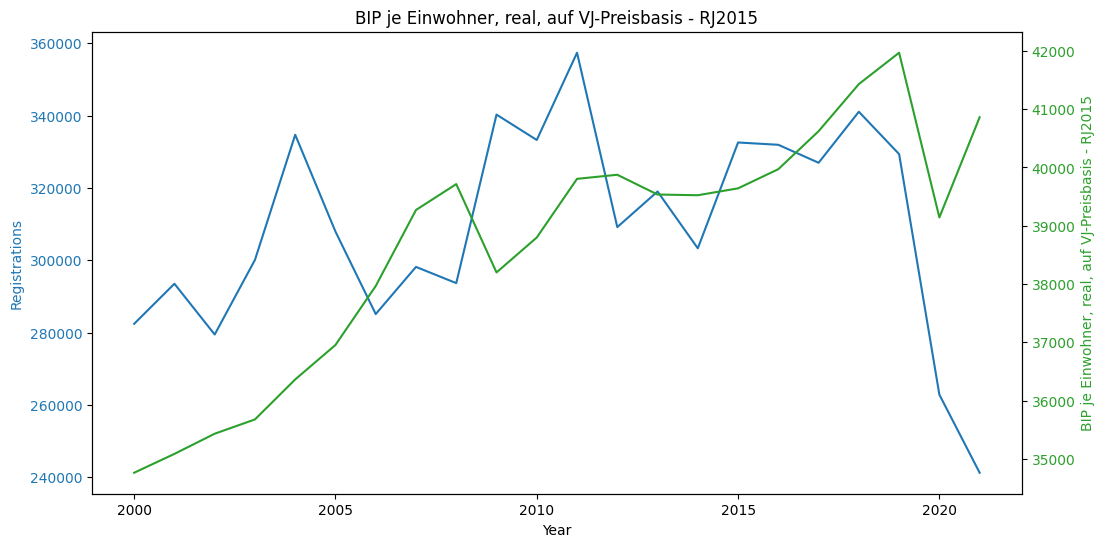

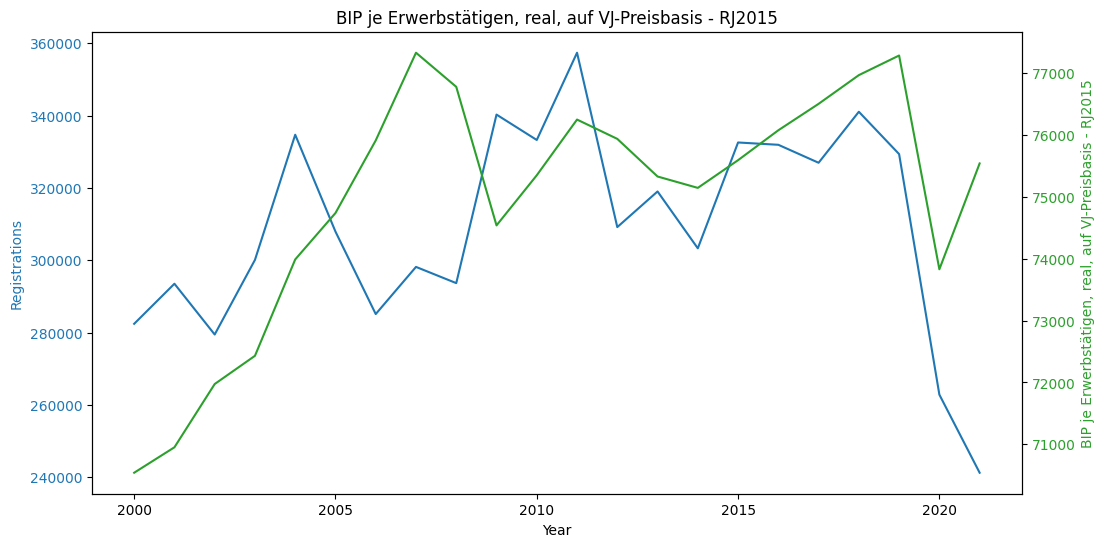

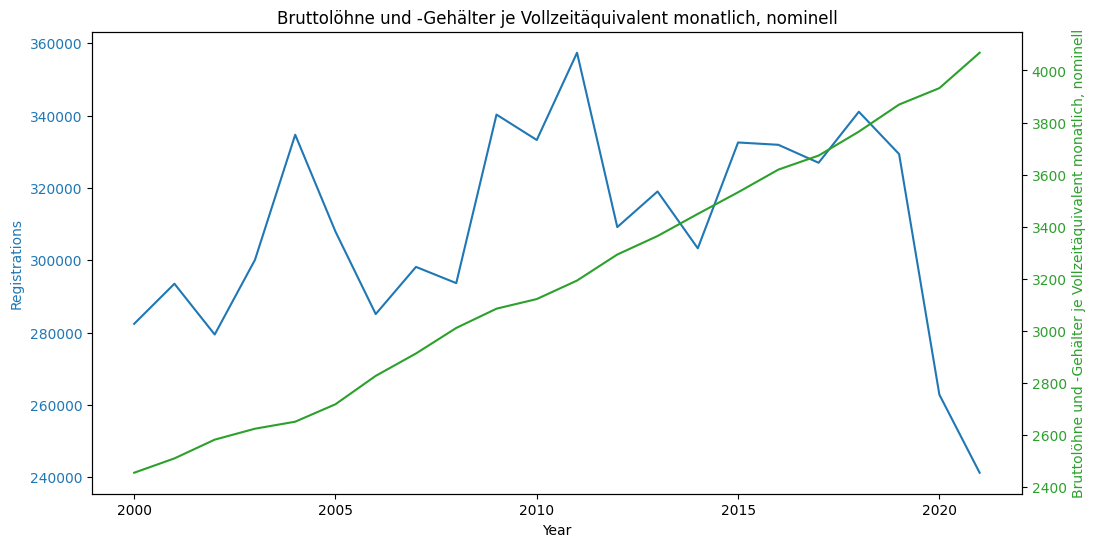

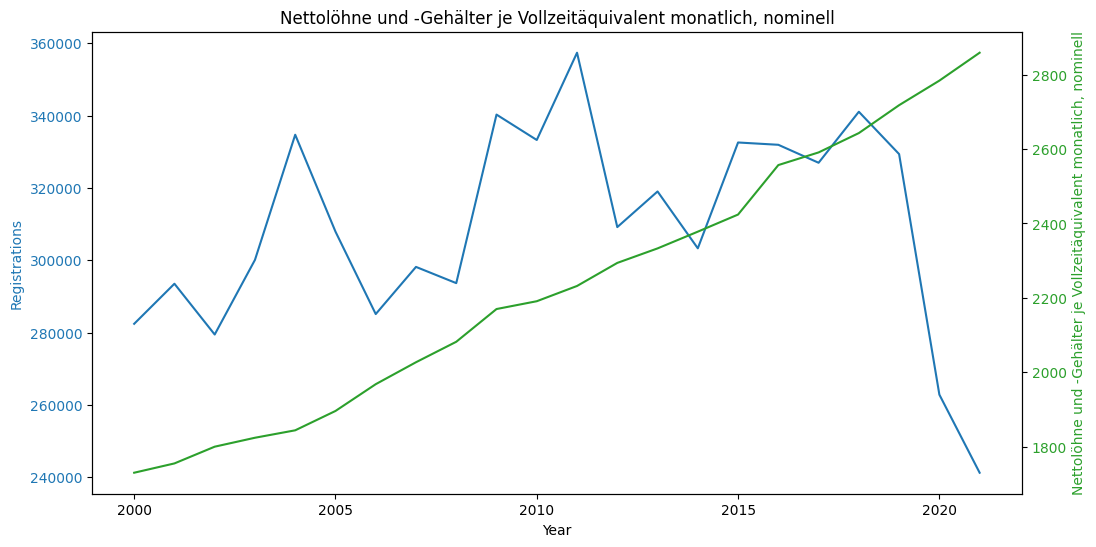

/var/folders/qx/sr_g4lss3fj344dfd48gwsmm0000gn/T/ipykernel_30548/2970510029.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains(dataset_name)].copy()


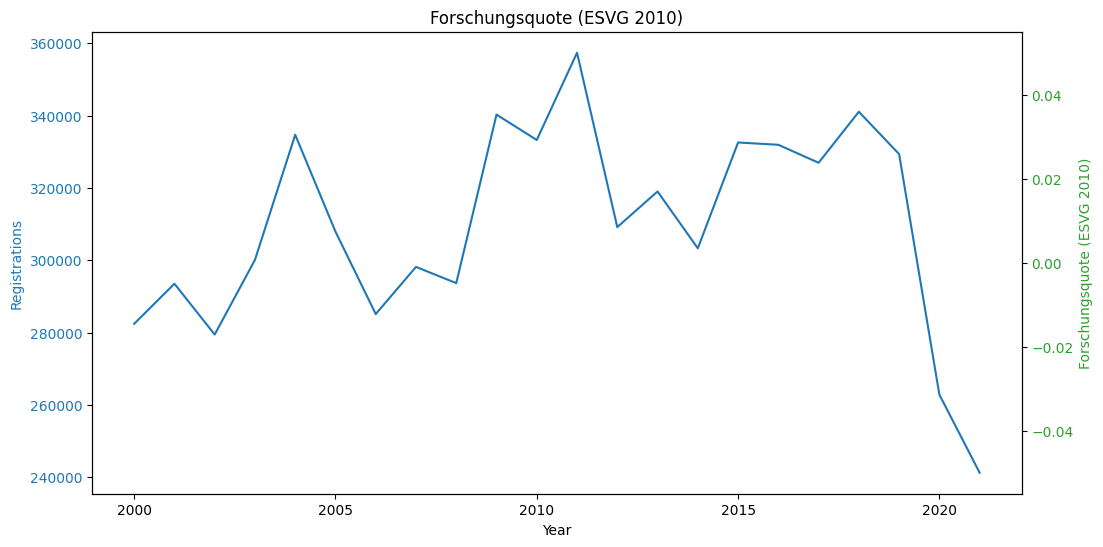

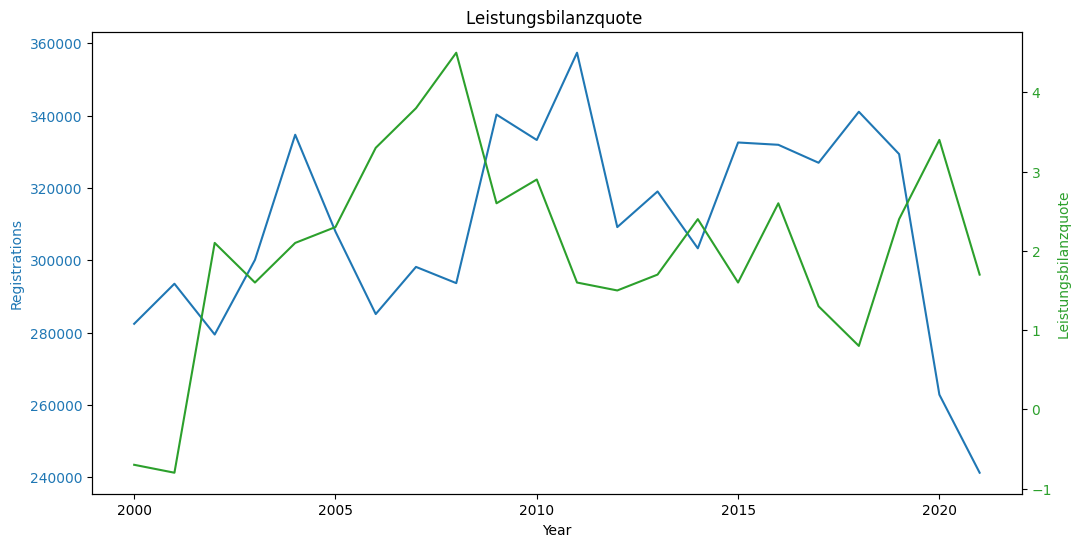

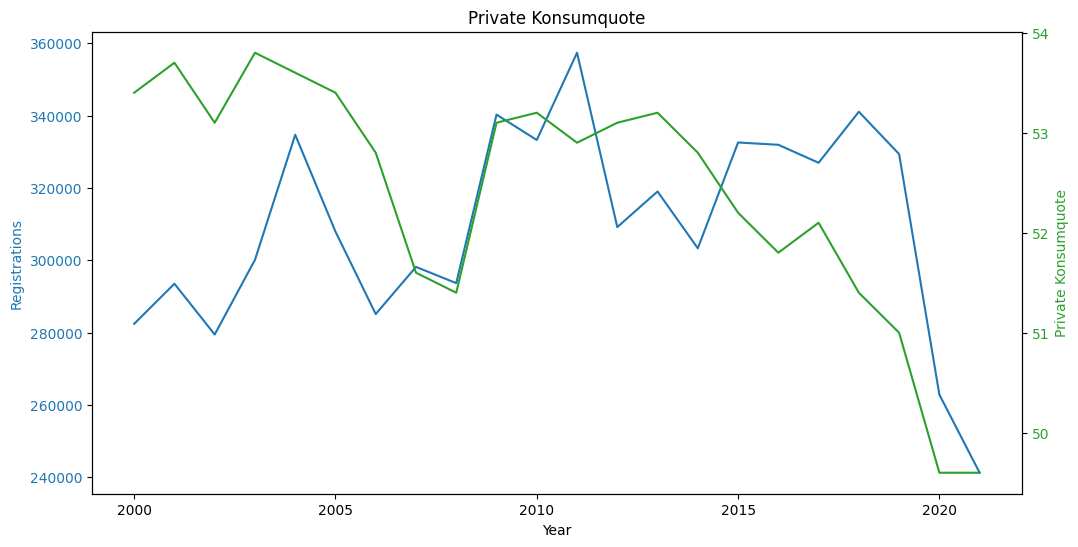

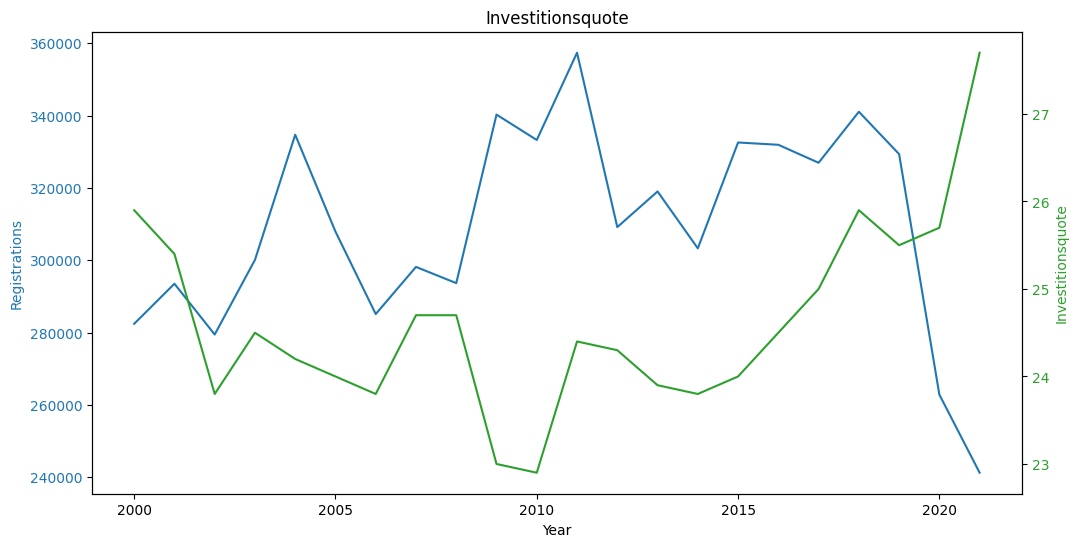

/var/folders/qx/sr_g4lss3fj344dfd48gwsmm0000gn/T/ipykernel_30548/2970510029.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains(dataset_name)].copy()


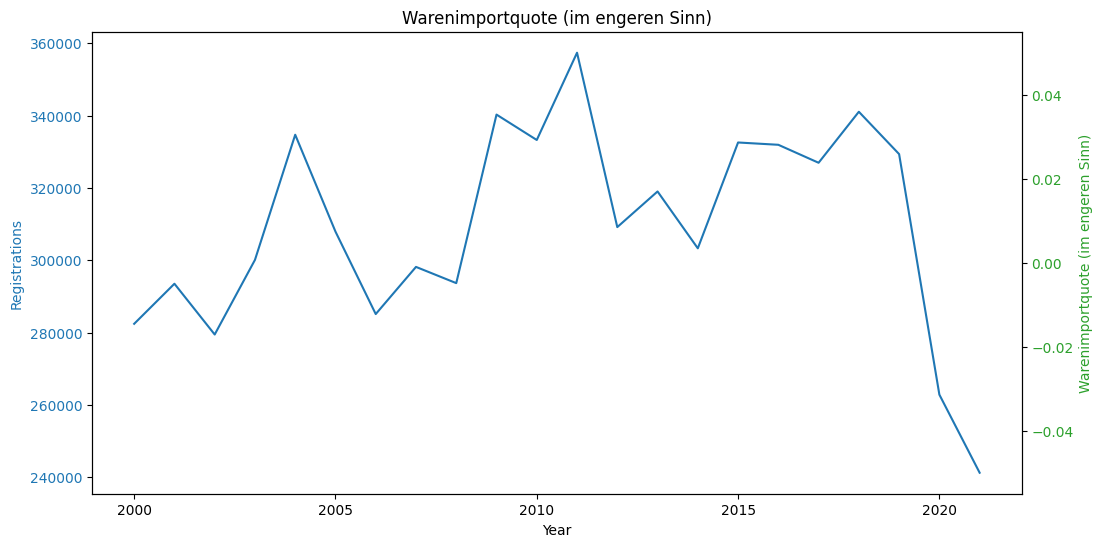

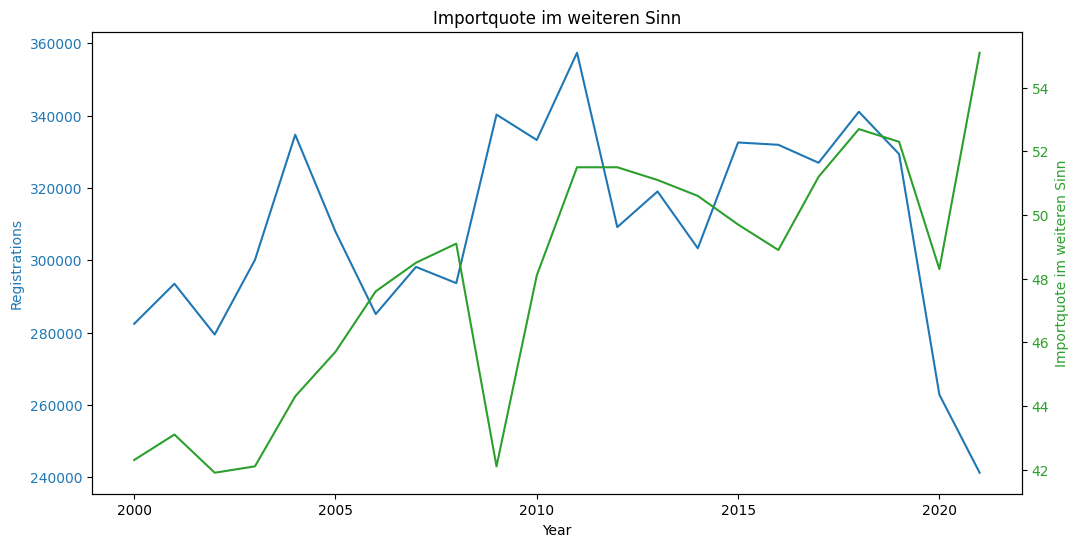

/var/folders/qx/sr_g4lss3fj344dfd48gwsmm0000gn/T/ipykernel_30548/2970510029.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains(dataset_name)].copy()


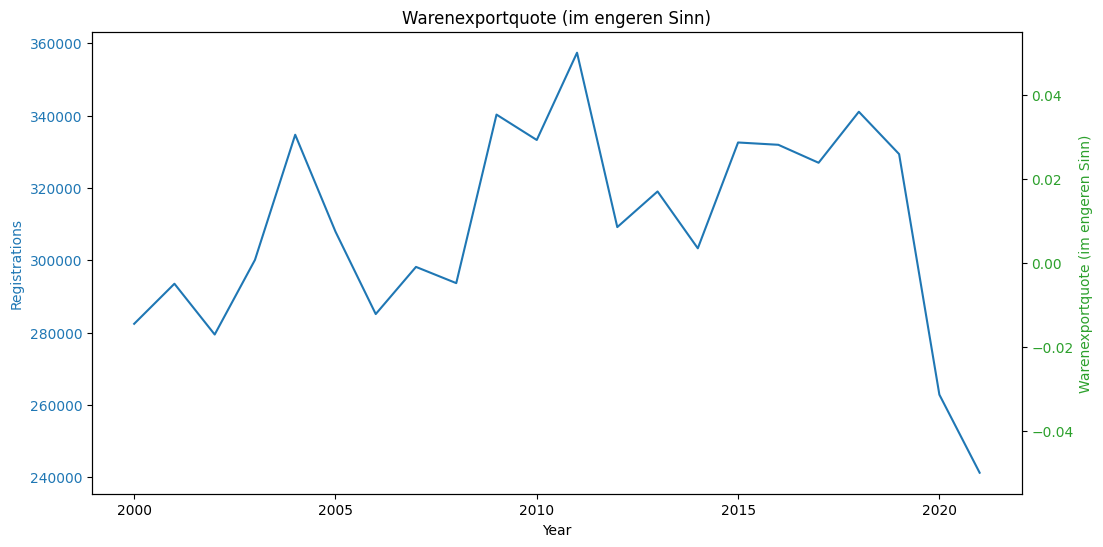

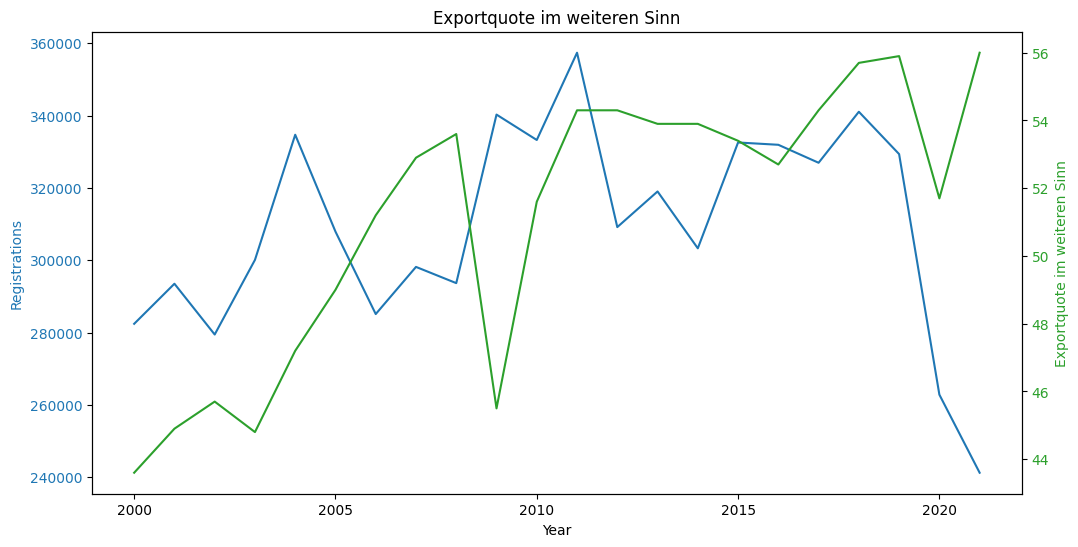

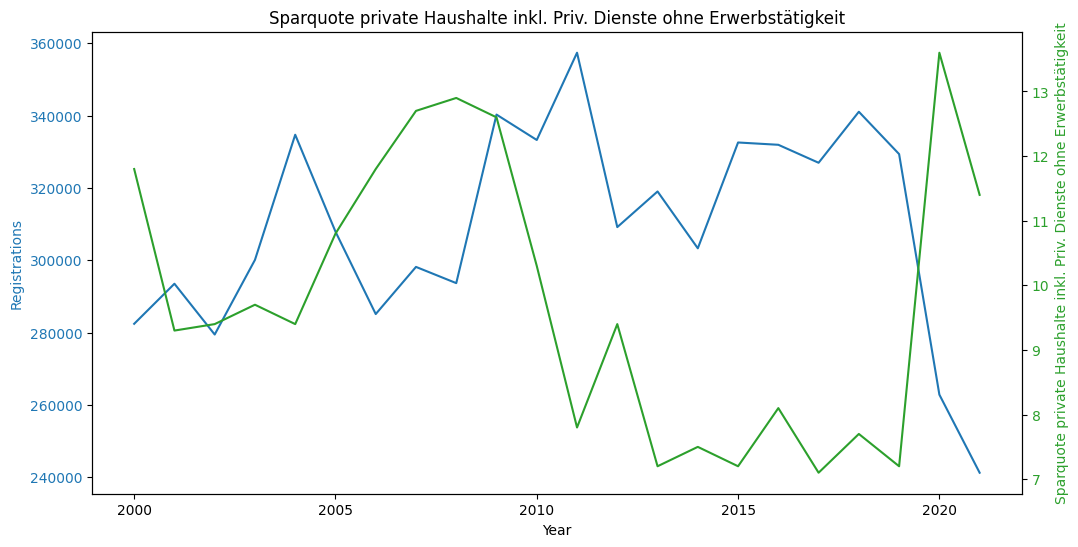

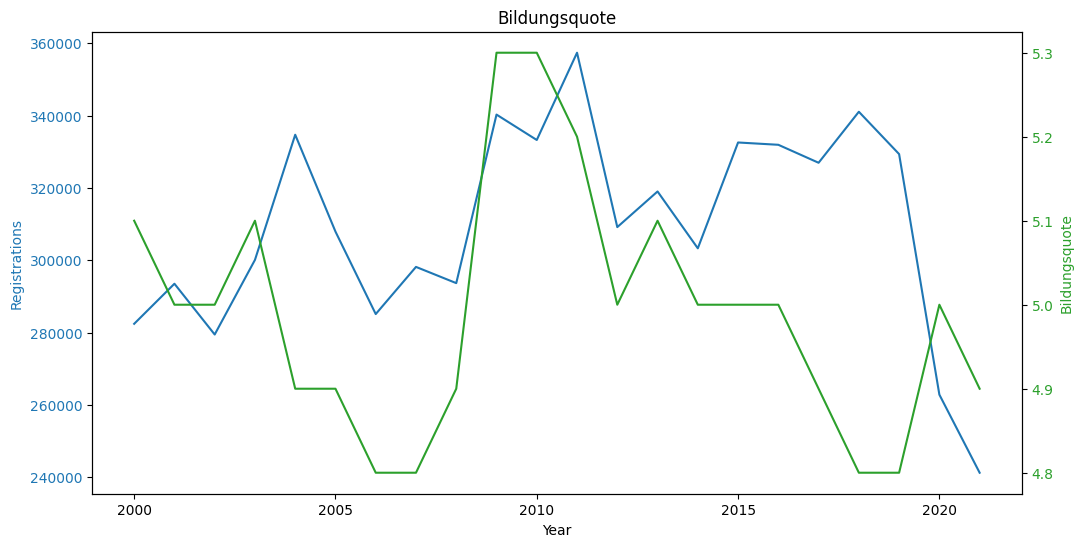

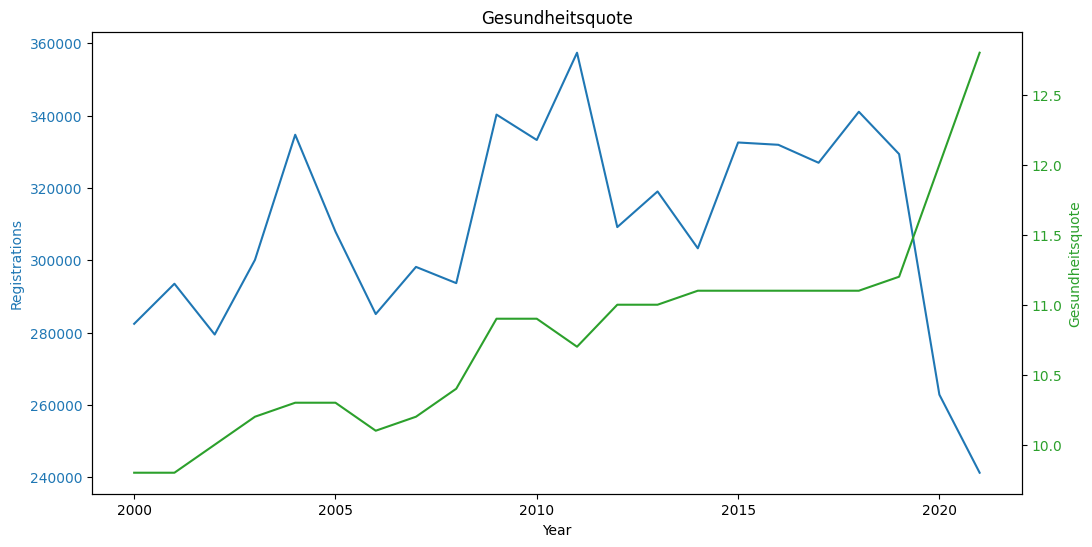

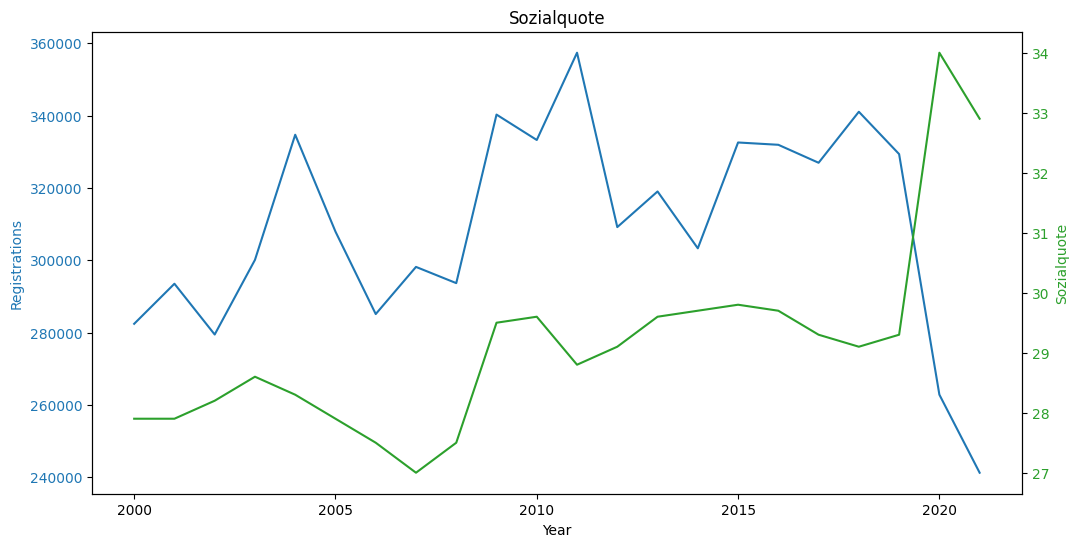

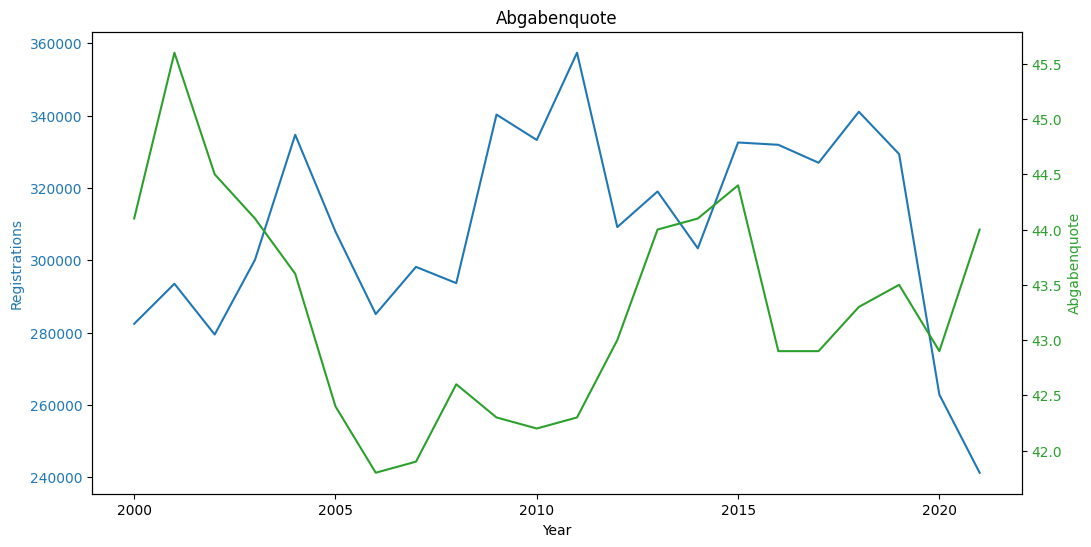

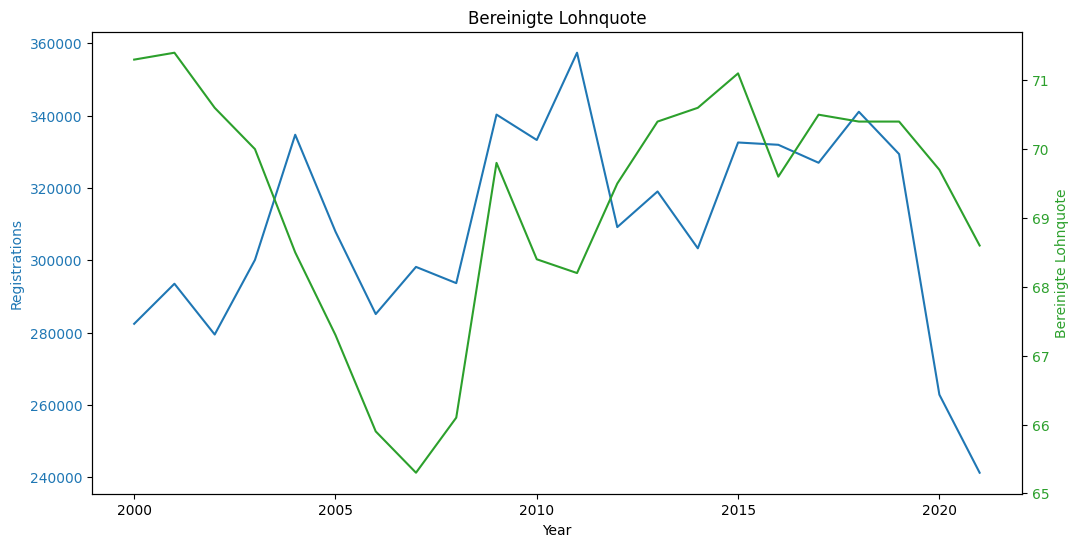

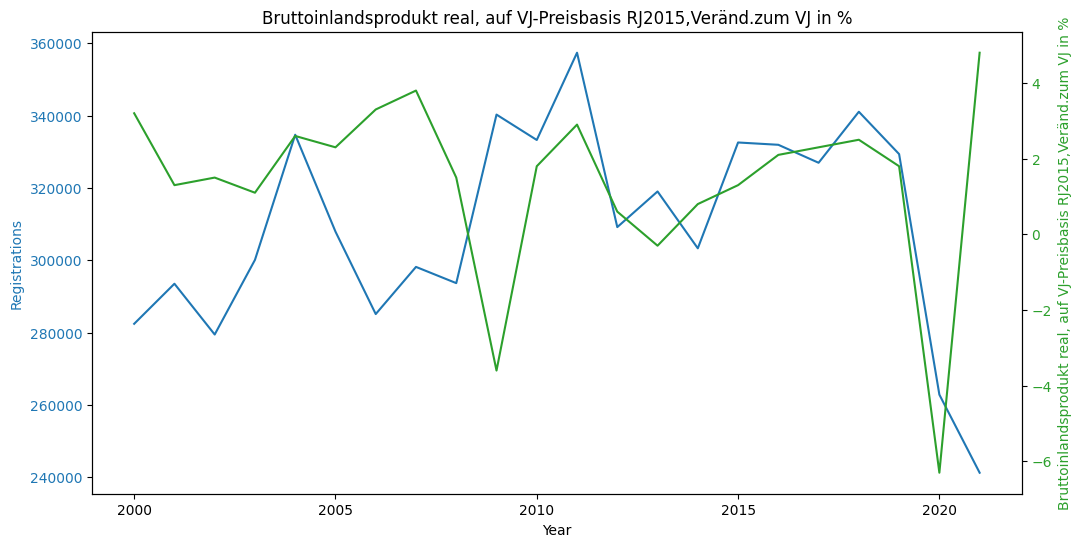

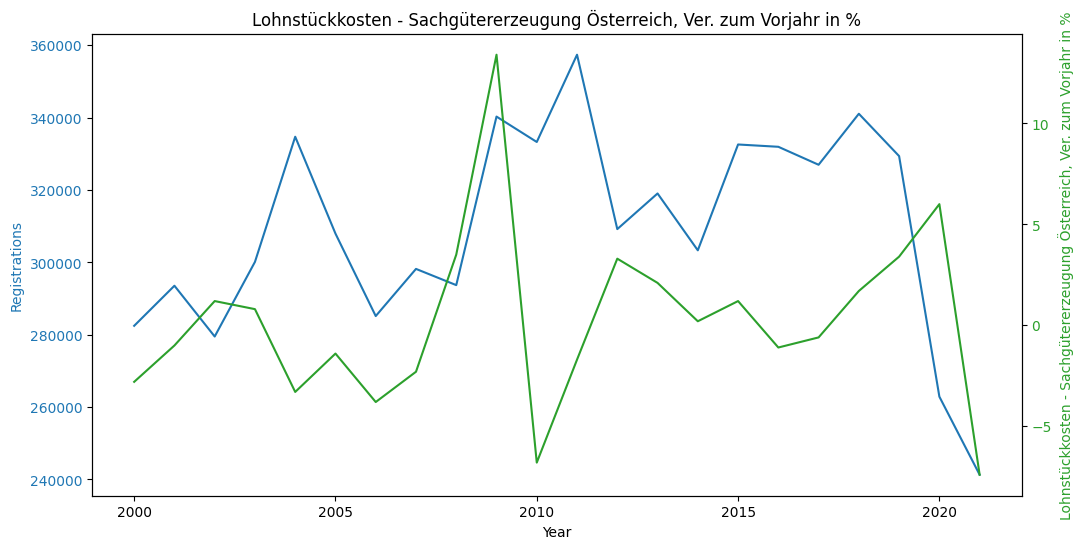

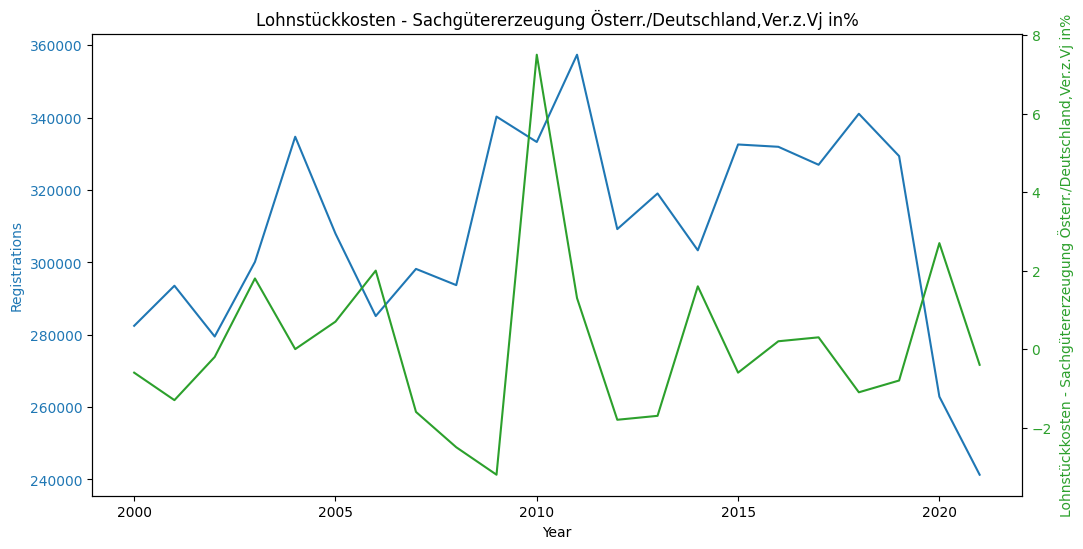

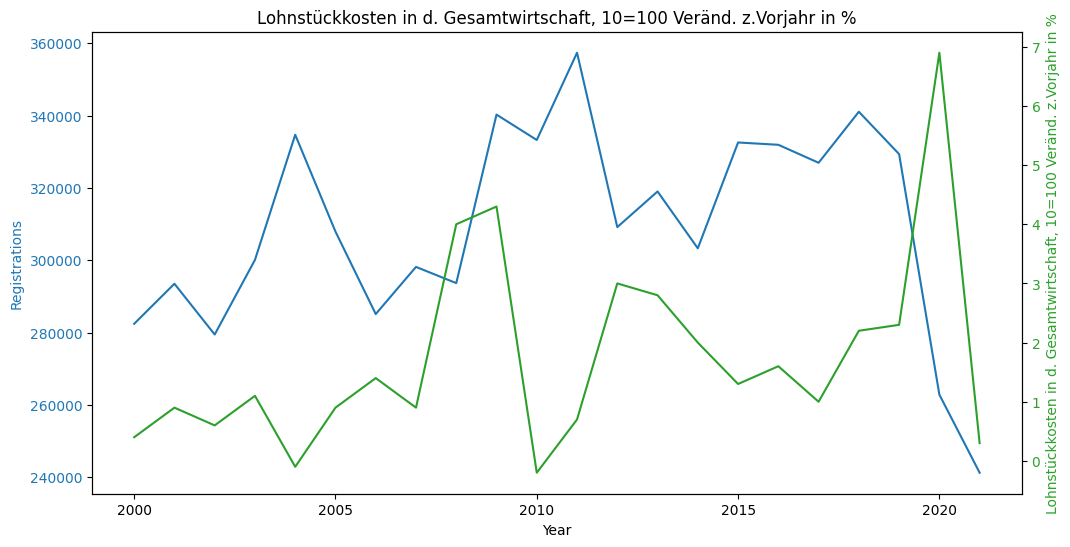

/var/folders/qx/sr_g4lss3fj344dfd48gwsmm0000gn/T/ipykernel_30548/2970510029.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bip_yearly = bip_yearly[bip_yearly["Indikator"].str.contains(dataset_name)].copy()


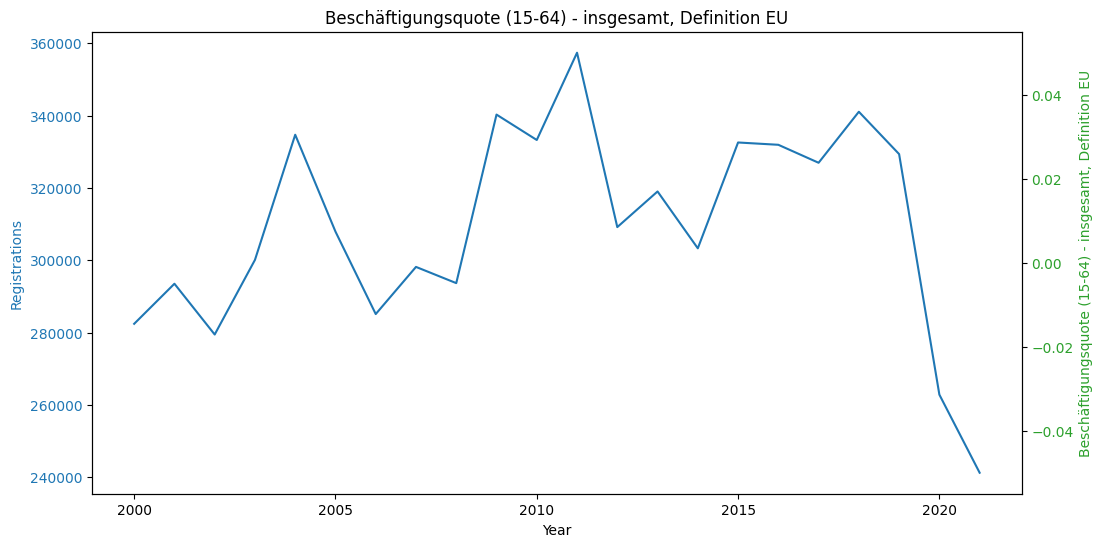

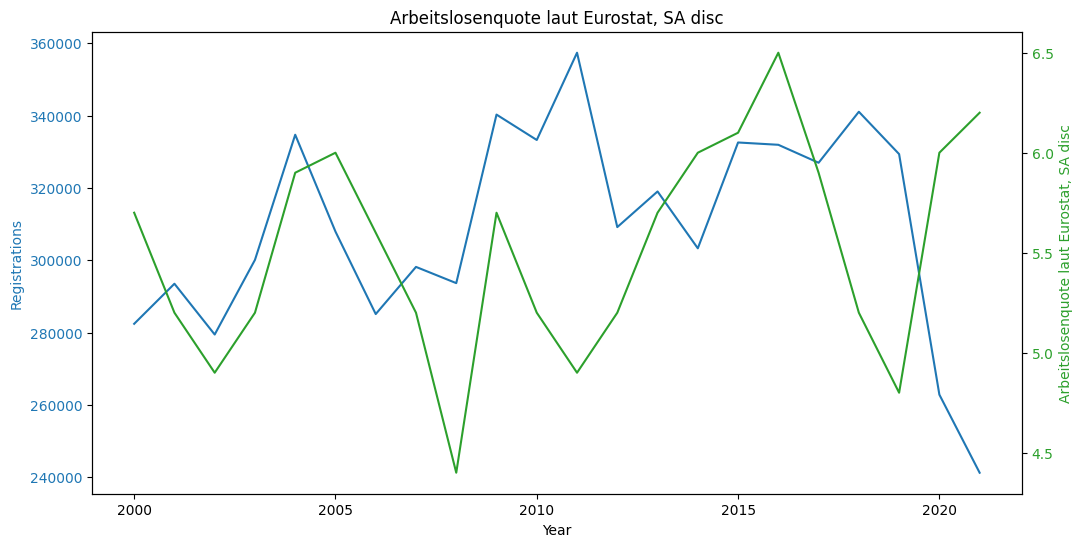

In [24]:
dataset = pd.read_csv("./Data/OeNB_7_1_AusgewähltevolkswirtschaftlicheKennziffern_20241008_192245.csv", encoding='latin1', sep=";")
dataset_names = dataset["Indikator"].unique()
for name in dataset_names:
    _plot(name)

In [49]:
# Berechnung des Pearson-Korrelationskoeffizienten
correlation, _ = pearsonr(reg_by_year["Registrations"], bip_yearly["Werte"])
print(f'Pearson-Korrelationskoeffizient: {correlation}')

# Erstellen eines Streudiagramms
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='BIP Growth (%)', y='Registrations', data=luxus_car_registrations_by_year)

#plt.title('Streudiagramm: Registrierungen vs BIP-Wachstum')
#plt.show()

ValueError: data type <class 'numpy.object_'> not inexact

### For Quarter

In [44]:
reg_by_year_quarter = luxus_car_registrations.groupby("Year-Quarter")["Registrations"].sum().to_frame()
reg_by_year_quarter.reset_index(inplace=True)
reg_by_year_quarter = reg_by_year_quarter.iloc[:-1]
reg_by_year_quarter.head(5)

,Year-Quarter,Registrations
0,2000Q1,213
1,2000Q2,341
2,2000Q3,209
3,2000Q4,112
4,2001Q1,236


In [45]:
bip_quarter = pd.read_csv("./Data/OeNB_10_8_Bruttoinlandsproduktreal_Quarter.csv", encoding='latin1', sep=";")
bip_quarter.head(1)

,Periode,Jahr,Halbjahr,Quartal,Monat,Tag,Indikator,Einheit,Status,Produzent,Region / Geschäftspartner,Datentyp,Werte,Sortierkriterium des Indikators
0,Quartal,2000,1,1,NaN,NaN,"Bruttoinlandsprodukt, 2010=100, real, SA, Belgien",Prozent,Weder saisonal noch um Arbeitstage bereinigt,Österreich,Insgesamt,Veränderung zur Vorjahresperiode in %,"4,8",AB011C005


In [41]:
bip_quarter.drop(columns=["Monat","Tag","Einheit","Status","Produzent","Region / Geschäftspartner","Datentyp", "Sortierkriterium des Indikators"], inplace=True)
bip_quarter = bip_quarter[bip_quarter["Indikator"].str.contains("Österreich")].copy()
bip_quarter["Jahr-Quartal"] = bip_quarter["Jahr"].astype(str) + "Q" + bip_quarter["Quartal"].astype(str)
bip_quarter = bip_quarter[bip_quarter["Jahr"] < 2023]
bip_quarter.drop(columns=["Periode","Jahr","Halbjahr","Quartal","Indikator"], inplace=True)
bip_quarter["Werte"] = bip_quarter["Werte"].str.replace(",", ".").astype(float)

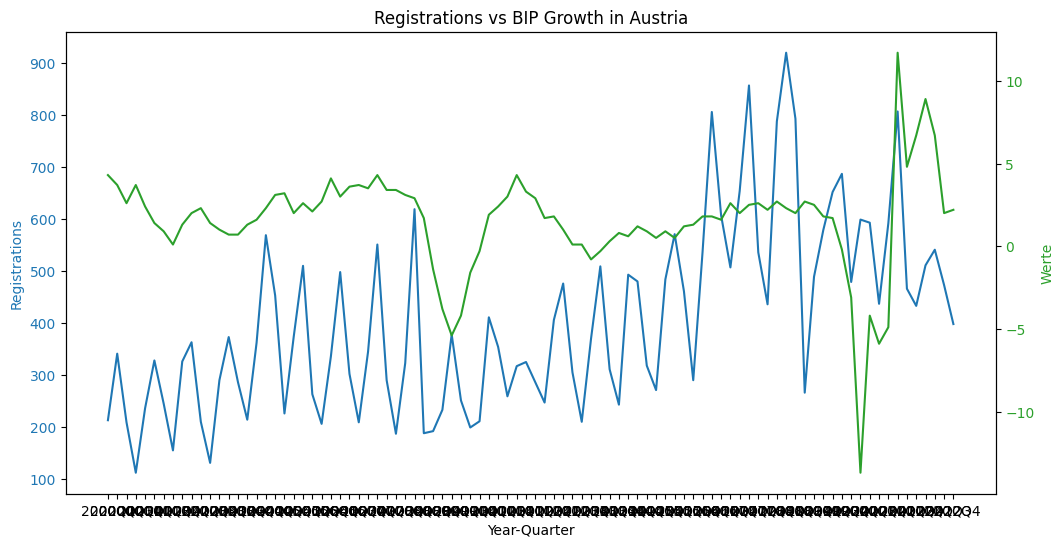

In [42]:
# Create a plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Ändere die Breite (z.B. 12) nach Bedarf

# Plotting Registrations on left y-axis
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Registrations', color='tab:blue')
ax1.plot(luxus_car_registrations_by_year['Year-Quarter'], luxus_car_registrations_by_year['Registrations'], color='tab:blue', label='Registrations')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for BIP Growth
ax2 = ax1.twinx()
ax2.set_ylabel('Werte', color='tab:green')
ax2.plot(bip['Jahr-Quartal'], bip['Werte'], color='tab:green', label='BIP Growth (%)')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add titles
plt.title('Registrations vs BIP Growth in Austria')

# Show the plot
plt.show()

In [43]:
# Berechnung des Pearson-Korrelationskoeffizienten
correlation, _ = pearsonr(luxus_car_registrations_by_year['Registrations'], bip['Werte'])
print(f'Pearson-Korrelationskoeffizient: {correlation}')

# Erstellen eines Streudiagramms
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='BIP Growth (%)', y='Registrations', data=luxus_car_registrations_by_year)

#plt.title('Streudiagramm: Registrierungen vs BIP-Wachstum')
#plt.show()

Pearson-Korrelationskoeffizient: 0.051012171252106484
